# Research Question & Hypothesis Statements
Research Question: Are Citi Bike users under 30 years of age significantly more likely bike for longer durations compared to the 
average user?

Null Hypothesis = Citi Bike users under the age of 35 bike for the same or shorter durations than the average user, significance level = 0.05.

Alternative Hypothesis = Citi Bike users under the age of 35 are significantly more likely to bike for longer durations than the average user.

Equations:

H0: Trip Duration(under 35) =< Trip Duration(total pop)

Ha: Trip Duration(under 35) > Trip Duration(total pop)

In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

import os
import json

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.getenv('PUI2016')

'/home/cusp/lag552/PUI2016'

In [3]:
os.getenv('PUIDATA')

'/home/cusp/lag552/PUIdata'

In [4]:
!curl -O 'https://s3.amazonaws.com/tripdata/201512-citibike-tripdata.zip'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 22.0M  100 22.0M    0     0  29.5M      0 --:--:-- --:--:-- --:--:-- 36.9M


### PLEASE NOTE: the below unzip function may mess up the below results if already performed once. I've kept it active for the TAs as they grade, but if the below functions are not working, it may need to be muted. 

In [5]:
!unzip 201512-citibike-tripdata.zip

In [6]:
citi_bike = pd.read_csv('201512-citibike-tripdata.csv')
citi_bike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,475,12/1/2015 07:35:36,12/1/2015 07:43:32,72,W 52 St & 11 Ave,40.767272,-73.993929,173,Broadway & W 49 St,40.760647,-73.984427,22780,Subscriber,1983.0,1
1,684,12/1/2015 07:38:15,12/1/2015 07:49:39,72,W 52 St & 11 Ave,40.767272,-73.993929,520,W 52 St & 5 Ave,40.759923,-73.976485,17787,Subscriber,1975.0,1
2,1063,12/1/2015 07:44:49,12/1/2015 08:02:33,72,W 52 St & 11 Ave,40.767272,-73.993929,358,Christopher St & Greenwich St,40.732916,-74.007114,18797,Subscriber,1966.0,1
3,1075,12/1/2015 08:02:29,12/1/2015 08:20:24,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,14625,Subscriber,1985.0,1
4,293,12/1/2015 08:06:37,12/1/2015 08:11:30,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,21238,Subscriber,1968.0,1


In [7]:
citi_bike.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [8]:
citi_bike.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'usertype', 'gender'], axis = 1, inplace = True)

In [9]:
citi_bike.head()

,tripduration,birth year
0,475,1983.0
1,684,1975.0
2,1063,1966.0
3,1075,1985.0
4,293,1968.0


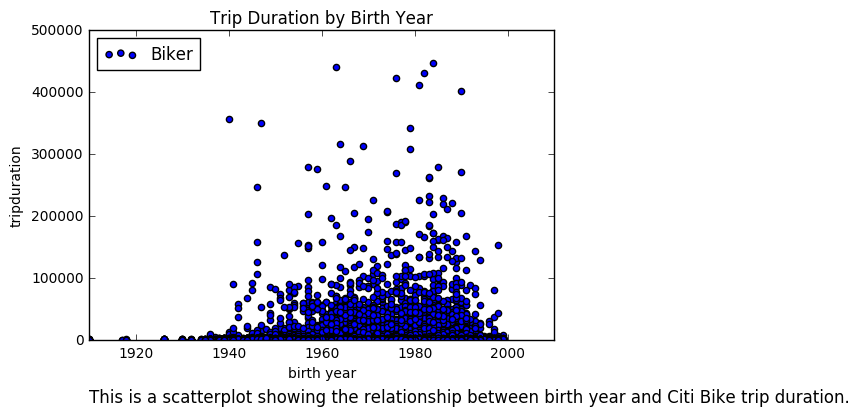

In [10]:
citi_bike.plot(x = 'birth year', y = 'tripduration', kind = 'scatter', label = 'Biker')
plt.axis([1910, 2010, 0, 500000])
plt.title('Trip Duration by Birth Year')
plt.text(1910, -100000, 'This is a scatterplot showing the relationship between birth year and Citi Bike trip duration.', fontsize = 12)
plt.legend(loc = 'upper left')
#citi_bike.plot(x = 'birth year', y = 'tripduration', kind = 'bar')

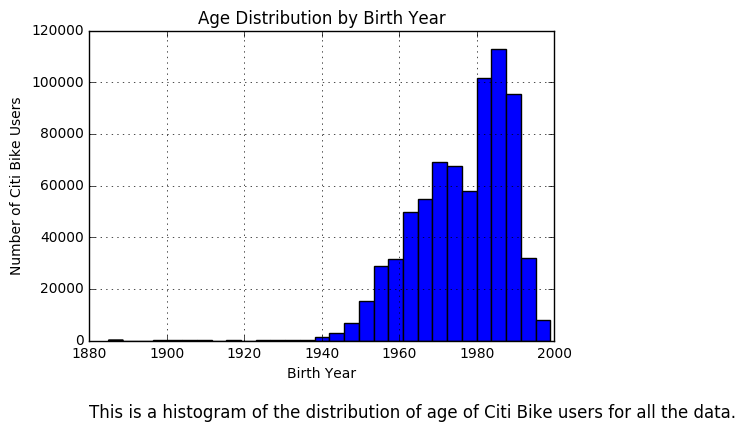

In [11]:
age_hist = citi_bike['birth year'].hist(bins = 30)
age_hist.set_title("Age Distribution by Birth Year")
age_hist.set_xlabel("Birth Year")
age_hist.set_ylabel("Number of Citi Bike Users")
plt.text(1880, -30000, 'This is a histogram of the distribution of age of Citi Bike users for all the data.', fontsize = 12 )

Because the above has some very clear outliers (and likely errors, since it is unlikely anyone born before 1910 is either alive or able to use a Citi Bike), we decided to cut out these outliers in the histogram below to get a more accurate view of age distribution.

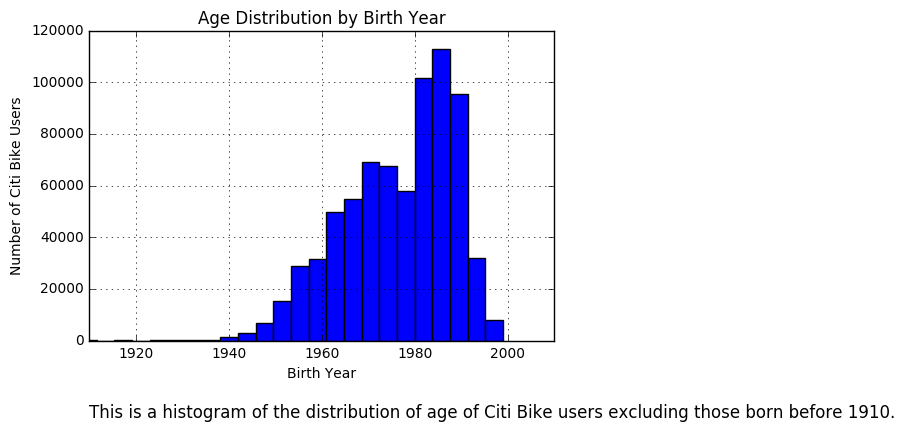

In [12]:
age_hist = citi_bike['birth year'].hist(bins = 30)
plt.axis([1910, 2010, 0, 120000])
age_hist.set_title("Age Distribution by Birth Year")
age_hist.set_xlabel("Birth Year")
age_hist.set_ylabel("Number of Citi Bike Users")
plt.text(1910, -30000, 'This is a histogram of the distribution of age of Citi Bike users excluding those born before 1910.', fontsize = 12)

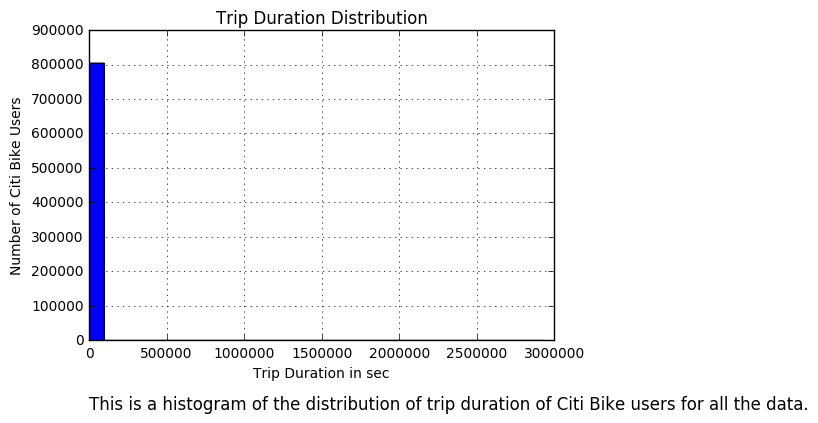

In [13]:
age_hist = citi_bike['tripduration'].hist(bins = 30)
age_hist.set_title("Trip Duration Distribution")
age_hist.set_xlabel("Trip Duration in sec")
age_hist.set_ylabel("Number of Citi Bike Users")
plt.text(0, -200000, 'This is a histogram of the distribution of trip duration of Citi Bike users for all the data.', fontsize  = 12)

Again, there are obvious outliers in the above figure making this difficult to read. These outliers are the minority of people who take very long trips using Citi Bike, whereas the majority are clearly using the system for shorter intervals (such as to commute to work). Below, we will only view the distribution for these shorter durations to get a clearer view of the distribution for the majority of users. 

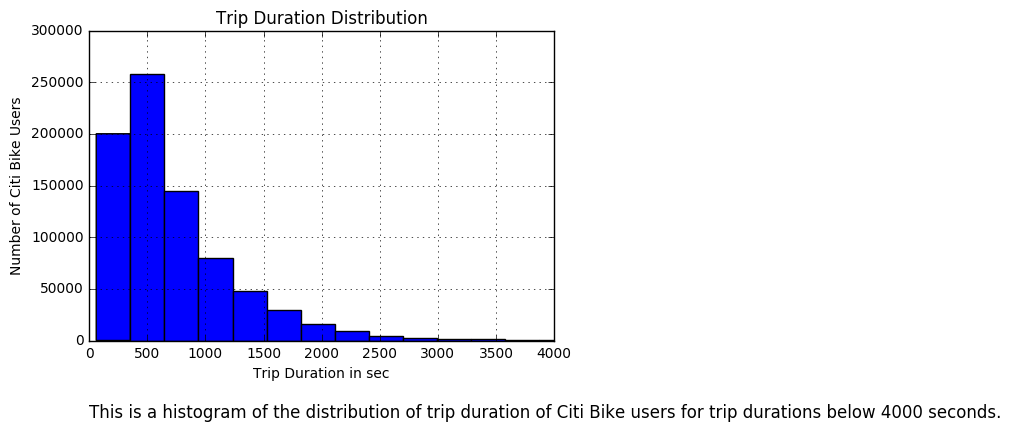

In [14]:
age_hist = citi_bike['tripduration'].hist(bins = 10000)
plt.axis([0, 4000, 0, 300000])
age_hist.set_title("Trip Duration Distribution")
age_hist.set_xlabel("Trip Duration in sec")
age_hist.set_ylabel("Number of Citi Bike Users")
plt.text(0, -75000, 'This is a histogram of the distribution of trip duration of Citi Bike users for trip durations below 4000 seconds.', fontsize = 12)